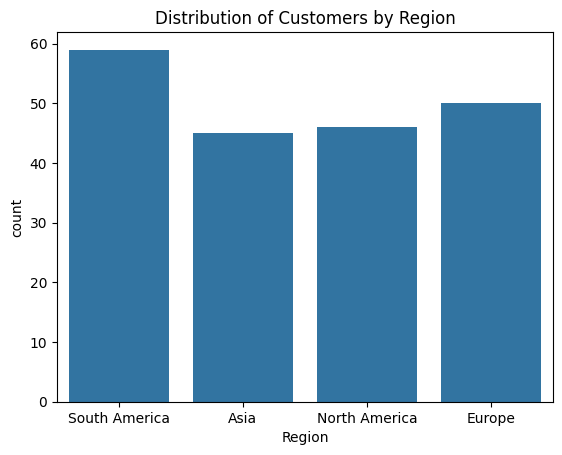

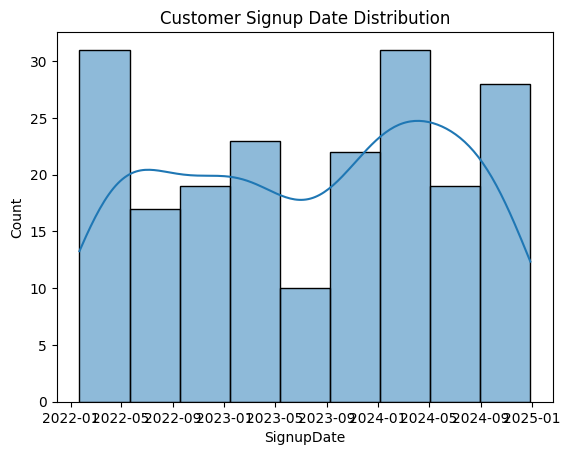

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Distribution of customers by region
sns.countplot(x='Region', data=customers)
plt.title('Distribution of Customers by Region')
plt.show()

# 2. Signup trends (Signup Date)
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
sns.histplot(customers['SignupDate'], kde=True)
plt.title('Customer Signup Date Distribution')
plt.show()


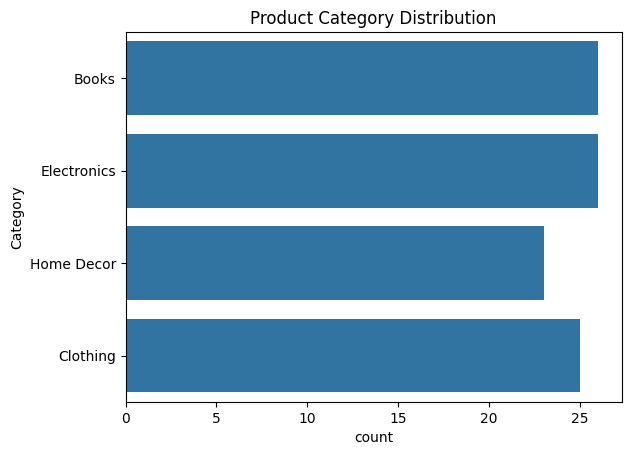

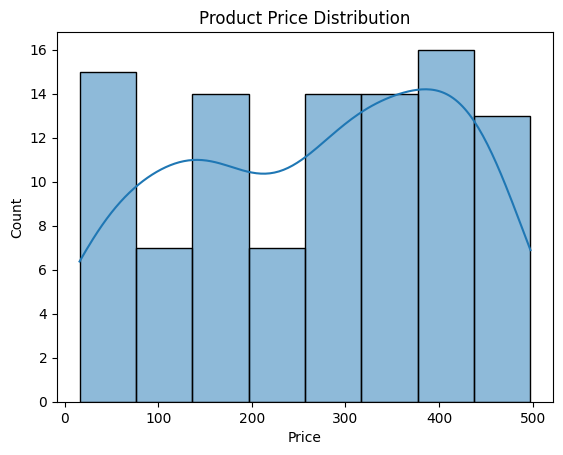

In [30]:
# Product category distribution
sns.countplot(y='Category', data=products)
plt.title('Product Category Distribution')
plt.show()

# Price distribution of products
sns.histplot(products['Price'], kde=True)
plt.title('Product Price Distribution')
plt.show()


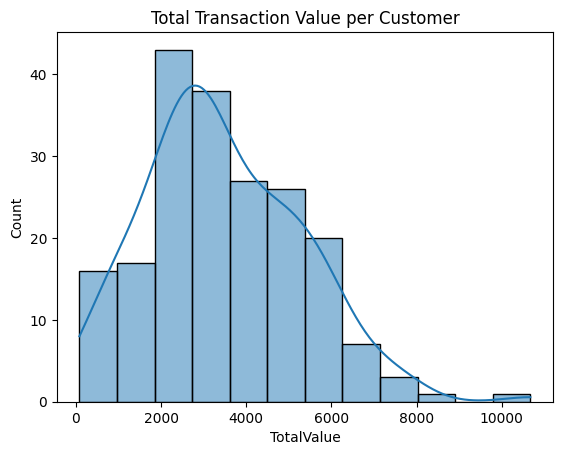

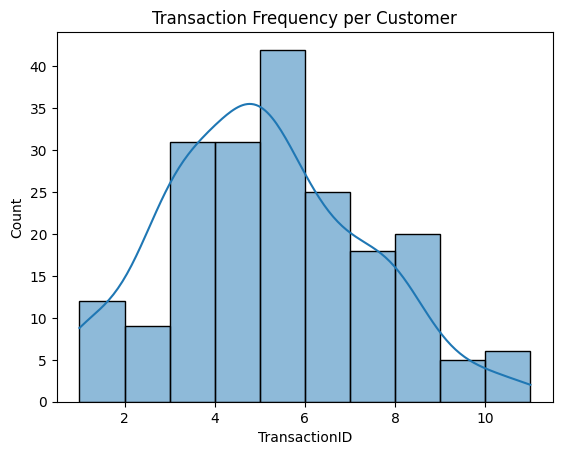

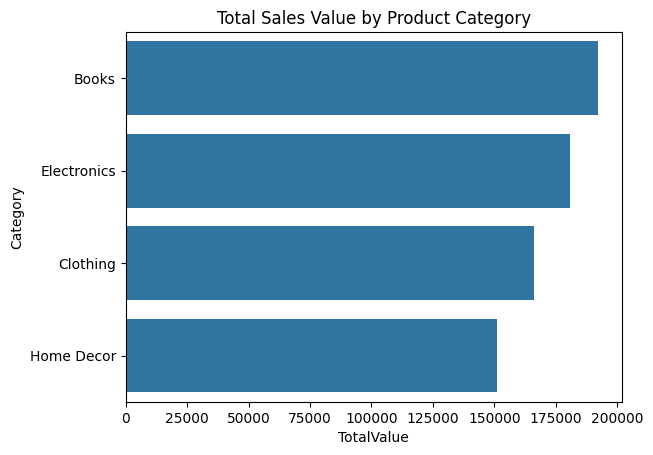

In [31]:
# Merging datasets for analysis
transactions_with_data = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')\
                                     .merge(products[['ProductID', 'Category', 'Price']], on='ProductID', how='left')

# Total value per customer
total_spend = transactions_with_data.groupby('CustomerID')['TotalValue'].sum().reset_index()
sns.histplot(total_spend['TotalValue'], kde=True)
plt.title('Total Transaction Value per Customer')
plt.show()

# Frequency of transactions per customer
transaction_count = transactions_with_data.groupby('CustomerID')['TransactionID'].count().reset_index()
sns.histplot(transaction_count['TransactionID'], kde=True)
plt.title('Transaction Frequency per Customer')
plt.show()

# Sales by product category
category_sales_value = transactions_with_data.groupby('Category')['TotalValue'].sum().reset_index()
category_sales_value = category_sales_value.sort_values(by='TotalValue', ascending=False)
sns.barplot(x='TotalValue', y='Category', data=category_sales_value)
plt.title('Total Sales Value by Product Category')
plt.show()


In [82]:
print(customers.columns)
print(products.columns)
print(transactions.columns)


Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [89]:
# Use a list of column names to select multiple columns
X = customer_data[['Quantity', 'TotalValue', 'Price']].fillna(0)

KeyError: "['Quantity', 'Price'] not in index"